# 1. Setup and Imports

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Core Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# 2. Load Dataset

In [ ]:
# Mount if using Google Colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Heart Disease Prediction/heart.csv')

#3. Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


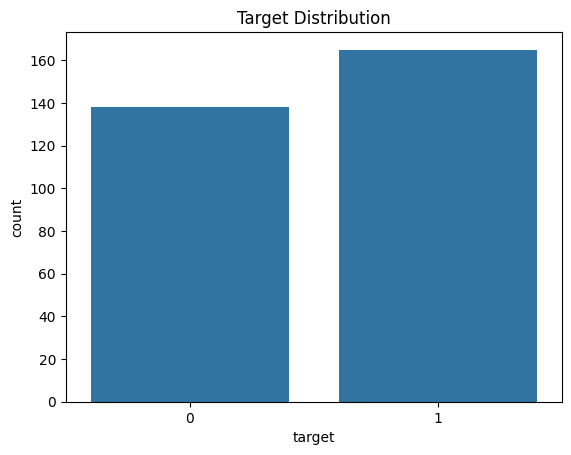

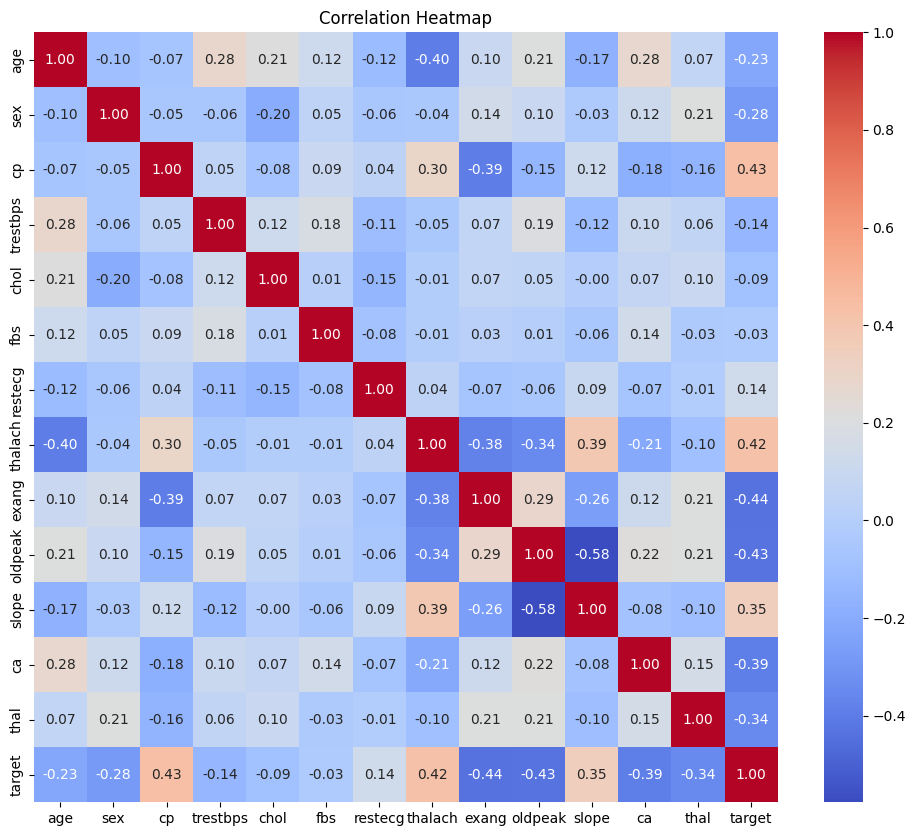

In [ ]:
# Quick look
df.head()

# Basic info
df.info()

# Target distribution
sns.countplot(data=df, x='target')
plt.title("Target Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# 4. Data Cleaning & Feature Engineering

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Convert categorical columns if needed
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[categorical] = df[categorical].astype('category')


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# 5. Train-Test Split

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#6. Model Pipelines
Created 3 models to compare:

##- Logistic Regression:

In [ ]:
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

log_reg_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

##-Random Forest:

In [ ]:
rf_pipeline = Pipeline([
    ('clf', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('clf', RandomForestClassifier(random_state=42))])

##-SVM

In [ ]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
])

svm_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('clf', SVC())])

#7. Evaluation Function


--- Logistic Regression ---
Accuracy: 0.8032786885245902
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



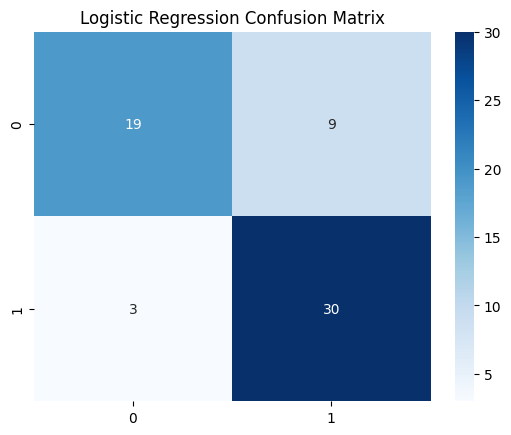

--- Random Forest ---
Accuracy: 0.8360655737704918
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



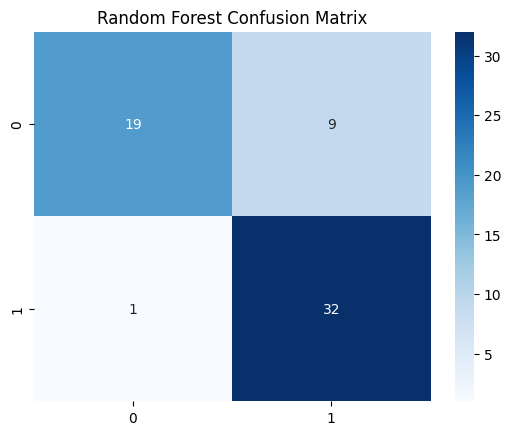

--- SVM ---
Accuracy: 0.819672131147541
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



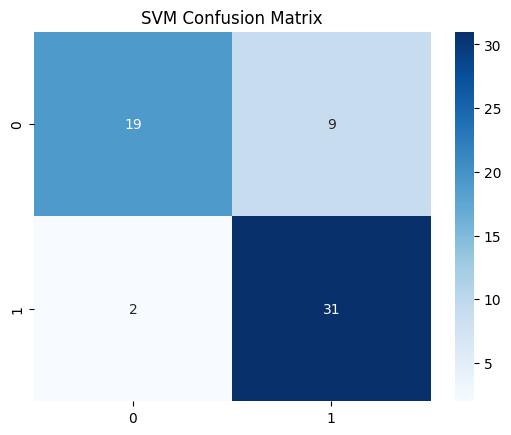

In [ ]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f'{name} Confusion Matrix')
    plt.show()

evaluate_model("Logistic Regression", log_reg_pipeline, X_test, y_test)
evaluate_model("Random Forest", rf_pipeline, X_test, y_test)
evaluate_model("SVM", svm_pipeline, X_test, y_test)


# 8. Hyperparameter Tuning

Best Parameters: {'clf__max_depth': None, 'clf__n_estimators': 200}
--- Tuned Random Forest ---
Accuracy: 0.819672131147541
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61



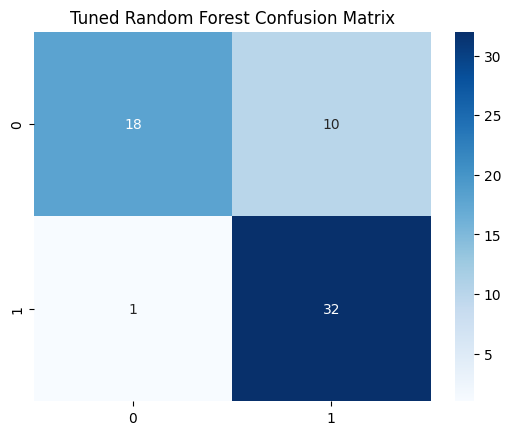

In [ ]:
param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 5, 10],
}

grid = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
evaluate_model("Tuned Random Forest", grid.best_estimator_, X_test, y_test)


#9.Feature Importance Visualization
Helps answer: Which features matter most in predicting heart disease?

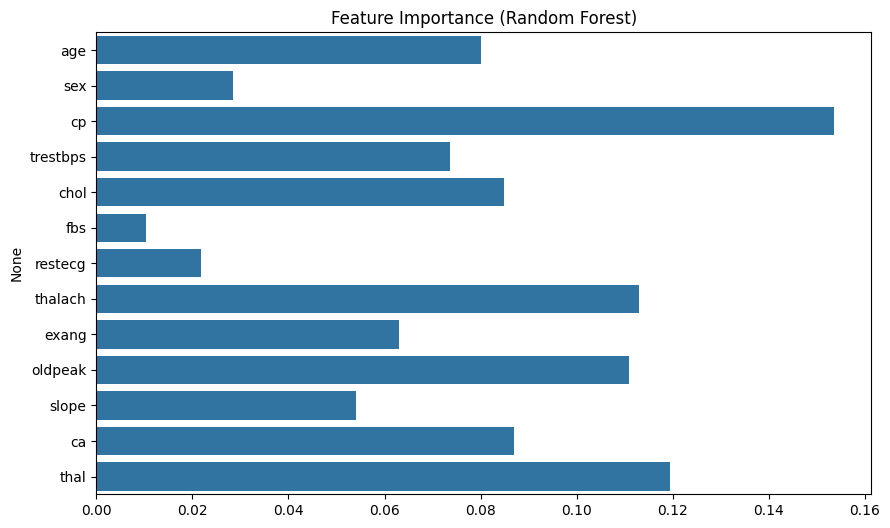

In [ ]:
# Get feature importances from the best RF model
best_rf = grid.best_estimator_.named_steps['clf']
importances = best_rf.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()


#10. ROC-AUC Curve
Adds a performance metric beyond accuracy. This is especially helpful for healthcare.

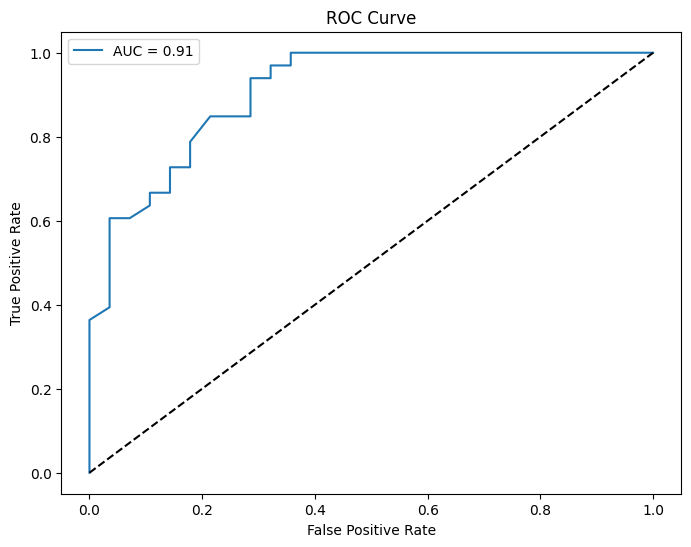

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


#11.  SHAP (Model Explainability)
Explains individual predictions

Classes in model: [0 1]
SHAP values shape: (61, 13, 2)
X_test shape: (61, 13)


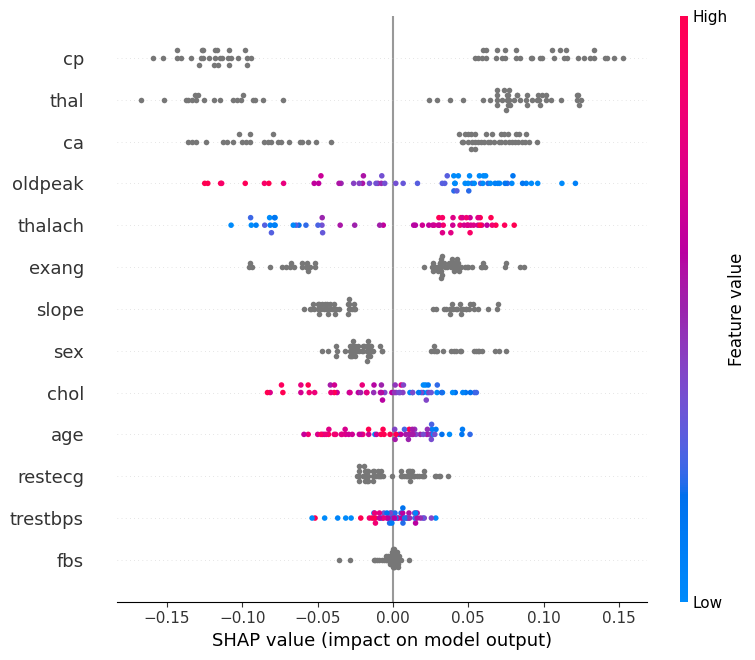

In [ ]:
import shap
import pandas as pd

# 1. Confirm it's binary classification
print("Classes in model:", best_rf.classes_)

# 2. Use X_test as-is (no categorical columns need encoding)
# All features are numeric already in your case
X_test_clean = X_test.copy()

# 3. Compute SHAP values
explainer = shap.TreeExplainer(best_rf)
# Note: For binary classification, TreeExplainer can sometimes return a list [shap_class_0, shap_class_1]
# or a single 3D array (n_samples, n_features, 2). We will handle the 3D case here as indicated by the error.
shap_values = explainer.shap_values(X_test_clean)

# 4. Check shapes
print("SHAP values shape:", shap_values.shape) # Print the actual shape received
print("X_test shape:", X_test_clean.shape)

# 5. Summary plot (global feature impact)
# Select the SHAP values for class 1 (positive class) from the 3D array
# This assumes the last dimension of shap_values corresponds to the classes [0, 1]
shap.summary_plot(shap_values[:, :, 1], X_test_clean, feature_names=X_test_clean.columns.tolist())

#Plot Breakdown:
Features are ranked by importance (top = most impact on prediction)

Each dot = one patient

Color = feature value (red = high, blue = low)

X-axis = how much that feature pushed the model output toward predicting heart disease

### 🔍 SHAP Summary Plot – Model Explainability

The SHAP plot shows how each feature contributes to the prediction of heart disease.

- **`cp` (chest pain type)** and **`thal`** are the most important features in the model.
- High **`oldpeak`** and low **`thalach`** increase predicted risk.
- This aligns well with clinical intuition and enhances the model’s trustworthiness in real-world settings.

The color gradient shows whether a feature was high (red) or low (blue), and how that influenced each prediction.

This plot is critical in medical applications where understanding model decisions is as important as the predictions themselves.


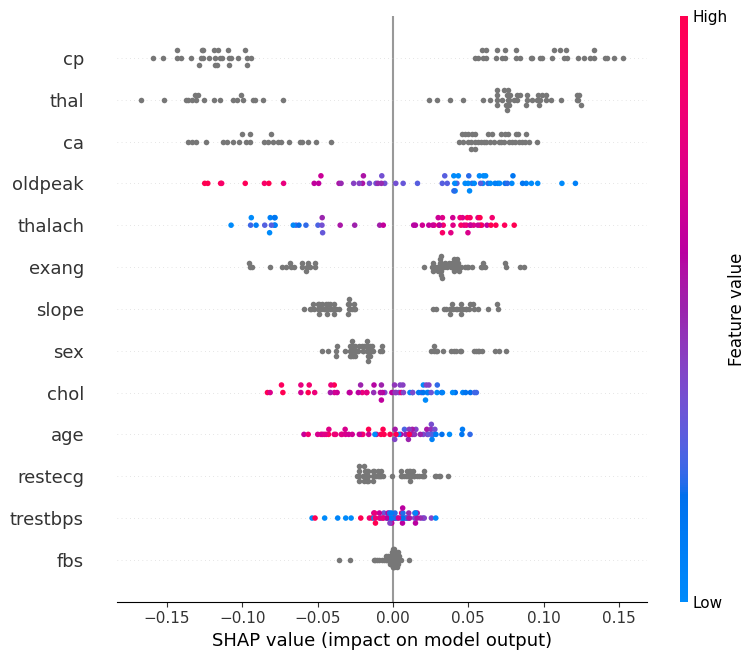

In [ ]:
# Assuming shap_values is a 3D array (n_samples, n_features, n_classes)
# Select SHAP values for class 1 (index 1) across all samples and features
shap.summary_plot(shap_values[:, :, 1], X_test, color=X_test['oldpeak'])

#SHAP Summary Plot for Continuous Features

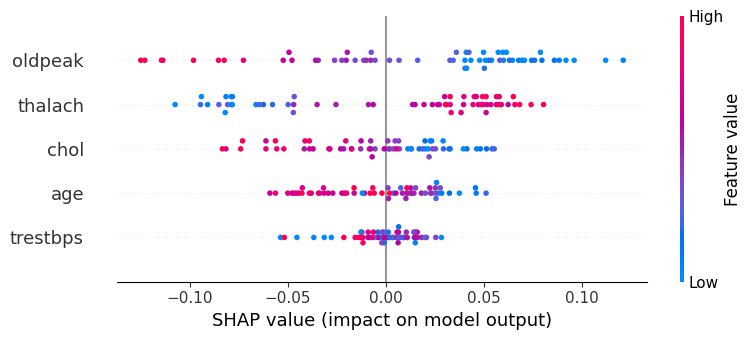

In [ ]:
continuous_features = ['oldpeak', 'thalach', 'chol', 'age', 'trestbps']

feature_indices = [X_test.columns.get_loc(f) for f in continuous_features]
shap.summary_plot(
    shap_values[:, feature_indices, 1],
    X_test[continuous_features],
    feature_names=continuous_features
)


#SHAP Summary Plot for Categorical/Binary Features

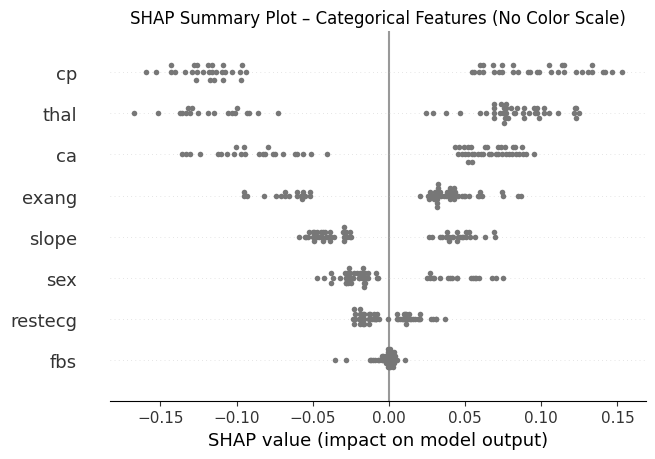

In [ ]:
import matplotlib.pyplot as plt
import shap

categorical_features = ['cp', 'thal', 'ca', 'exang', 'slope', 'sex', 'restecg', 'fbs']
feature_indices_cat = [X_test.columns.get_loc(f) for f in categorical_features]

# Make plot without the color bar
plt.figure()
# Remove the 'plot_color' argument
shap.summary_plot(
    shap_values[:, feature_indices_cat, 1],
    X_test[categorical_features],
    feature_names=categorical_features,
    # Removed plot_color=None
    show=False
)

# Manually remove colorbar from plot
plt.gcf().axes[-1].remove()  # This removes the colorbar axis
plt.title("SHAP Summary Plot – Categorical Features (No Color Scale)")
plt.tight_layout()
plt.show()

## 🔚 Final Summary

This heart disease prediction project uses a Random Forest classifier trained on 13 patient health indicators to predict the likelihood of heart disease. The model achieved an accuracy of **~84%**, with strong precision and recall on both classes.

To enhance interpretability, we used **SHAP values** to understand feature impact:

- **`cp` (chest pain type)**, **`thal`**, and **`ca`** were the top predictors.
- High `oldpeak` and low `thalach` increased predicted risk.
- We separated **continuous** and **categorical** SHAP plots to avoid misleading color artifacts, improving clarity.

This workflow demonstrates not just strong model performance, but also a deep focus on **transparency** and **trust**, which are essential in healthcare AI.
